In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [8]:
# Read in data
df = pd.read_csv('Reviews.csv')
print(df.shape)
df = df.sample(n=500)
print(df.shape)

(568454, 10)
(500, 10)


In [9]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
511289,511290,B004FGWU9O,A29BHW9YT2FZ77,JackieTH,3,3,3,1296432000,Average quality French roast,I really like to mix things up with k-cups and...
467025,467026,B001035NQM,A1NJXFN4V5AUOL,Karen Delgrosso,0,0,5,1237507200,Neat Shape,"Had never seen this shape before, love them fo..."
96967,96968,B0000DK4ZR,A1SKVGZZZSIBGN,"April N. Hobbs ""MatsGrl""",0,0,5,1325548800,perfect,Bought this for a friend and she loved it.<br ...
51966,51967,B001CPUPMA,A157V8K12079DI,"Arlene Applebaum ""Arlene A. &#34;happy consum...",1,1,5,1318723200,Awesome,"Very fast delivery, sealed properly keeping ch..."
336561,336562,B000BRR8VQ,A3K9Q3WL0OF7N1,"niecypoo ""niecypoo""",0,0,5,1345939200,finicky dog loves these,my finicky dog (small yorkie mix) just loves t...


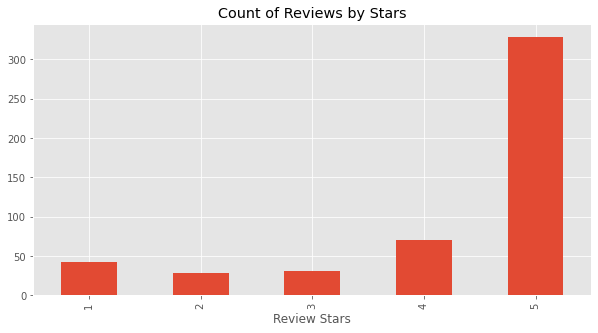

In [10]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [11]:
df_sorted = df.sort_values('HelpfulnessDenominator', ascending=False)
df_sorted.head(30)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
417134,417135,B00112ILZM,A2VFCUC88UKI0D,"J. Beckman ""ingenue""",145,147,5,1243987200,Ahhh-mazing ENERGY!,"This green powder is SO good, I just had to ge..."
395167,395168,B001EO5SC6,A1P3Z1ROTZSX4,K. Lake,62,65,1,1168646400,NOT All Natural,My own fault for not reading the ingredients -...
298987,298988,B001HTIC58,A172P5EVZE42MD,Thomas R Jackson,0,43,2,1302393600,Shouldn't have ordered it.,"Based on a recommendation from a friend, I pur..."
210716,210717,B001EQ4OWO,A374O3186D2HTX,"Kat ""doglover""",42,42,2,1302652800,i used to love these bags,i first found out about these bags several yea...
267682,267683,B000FMZO8G,A16459DAS8ND87,"oneintheweb ""oneintheweb""",24,30,3,1267228800,LOVE THEM...but HATE GMO corn oil.....,I contacted the company and they acknowledged ...
288977,288978,B000FNM5PU,A2VOSGI986B19O,Kirsten Mcguire,30,30,2,1323907200,so frustrated - I REALLY wanted to love it,Searching for food dye that does not have any ...
530716,530717,B0014ATRV8,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
205484,205485,B000Q555EK,ATI2O3UUC45SW,Kevin J. Barth,22,23,4,1203465600,A fine chocolate for mixing coffee beverages,I'm afraid that many of the negative reviews a...
37605,37606,B000QT5ZGO,ATCSY081RGVC5,"N. Grant ""Nicole Dehlin""",23,23,5,1199836800,Eating these since I was a kid...,These little packets carry 4 'leafs' of seawee...
402147,402148,B000Q738VU,A2FC2IGNFNQP95,M. Hauser,10,23,2,1211587200,Misleading product name,This product may indeed be delicious but the p...


In [19]:
example = df['Text'][417134]
print(example)

This green powder is SO good, I just had to get the word out. Others I've tried (Whole Foods brand, Barlean's Greens, Berry Green, many others) literally taste just like grass clippings, so you have no choice but to mix it with juice or a smoothie. THIS green superfood is palatable enough to drink just mixed with water! (Let me explain: do not expect it to be SWEET. This is a veggie drink, but it has an ever-so-slight hint of raspberry that's pleasing to the tongue when you gulp it down.)<br /><br />Healthwise, I've notice that my skin has gotten clearer, my energy levels have evened out, and I've harly even gotten a cough, let alone a cold, in the several years I've been drinking this- and I work with the sick and elderly.<br /><br />Yes, there is sediment, but that is because this drink has FIBER in it- the kind that is naturally in fruits and veggies.<br /><br />Accept it for what it is, compare it to the alternatives, and imagine how incredibly amazing you will feel. Then make your

In [20]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'green', 'powder', 'is', 'SO', 'good', ',', 'I', 'just', 'had']

In [22]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('green', 'JJ'),
 ('powder', 'NN'),
 ('is', 'VBZ'),
 ('SO', 'RB'),
 ('good', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('just', 'RB'),
 ('had', 'VBD')]

In [23]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  green/JJ
  powder/NN
  is/VBZ
  SO/RB
  good/JJ
  ,/,
  I/PRP
  just/RB
  had/VBD
  to/TO
  get/VB
  the/DT
  word/NN
  out/RP
  ./.
  Others/NNS
  I/PRP
  've/VBP
  tried/VBN
  (/(
  (ORGANIZATION Whole/JJ Foods/NNP)
  brand/NN
  ,/,
  (PERSON Barlean/NNP)
  's/POS
  (GPE Greens/NNP)
  ,/,
  (PERSON Berry/NNP Green/NNP)
  ,/,
  many/JJ
  others/NNS
  )/)
  literally/RB
  taste/NN
  just/RB
  like/IN
  grass/NN
  clippings/NNS
  ,/,
  so/IN
  you/PRP
  have/VBP
  no/DT
  choice/NN
  but/CC
  to/TO
  mix/VB
  it/PRP
  with/IN
  juice/NN
  or/CC
  a/DT
  smoothie/NN
  ./.
  THIS/NNP
  green/JJ
  superfood/NN
  is/VBZ
  palatable/JJ
  enough/RB
  to/TO
  drink/VB
  just/RB
  mixed/JJ
  with/IN
  water/NN
  !/.
  (/(
  Let/VB
  me/PRP
  explain/VB
  :/:
  do/VB
  not/RB
  expect/VB
  it/PRP
  to/TO
  be/VB
  (ORGANIZATION SWEET/NNP)
  ./.
  This/DT
  is/VBZ
  a/DT
  veggie/JJ
  drink/NN
  ,/,
  but/CC
  it/PRP
  has/VBZ
  an/DT
  ever-so-slight/JJ
  hint/NN
  of/IN
  raspber

In [24]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [25]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [26]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [27]:
sia.polarity_scores(example)

{'neg': 0.043, 'neu': 0.808, 'pos': 0.149, 'compound': 0.9745}

In [28]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [29]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [30]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,511290,0.022,0.781,0.197,0.9751,B004FGWU9O,A29BHW9YT2FZ77,JackieTH,3,3,3,1296432000,Average quality French roast,I really like to mix things up with k-cups and...
1,467026,0.000,0.732,0.268,0.8555,B001035NQM,A1NJXFN4V5AUOL,Karen Delgrosso,0,0,5,1237507200,Neat Shape,"Had never seen this shape before, love them fo..."
2,96968,0.000,0.548,0.452,0.9491,B0000DK4ZR,A1SKVGZZZSIBGN,"April N. Hobbs ""MatsGrl""",0,0,5,1325548800,perfect,Bought this for a friend and she loved it.<br ...
3,51967,0.170,0.637,0.193,0.2786,B001CPUPMA,A157V8K12079DI,"Arlene Applebaum ""Arlene A. &#34;happy consum...",1,1,5,1318723200,Awesome,"Very fast delivery, sealed properly keeping ch..."
4,336562,0.000,0.684,0.316,0.8342,B000BRR8VQ,A3K9Q3WL0OF7N1,"niecypoo ""niecypoo""",0,0,5,1345939200,finicky dog loves these,my finicky dog (small yorkie mix) just loves t...


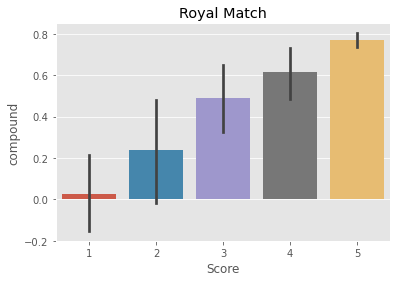

In [31]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Royal Match')
plt.show()

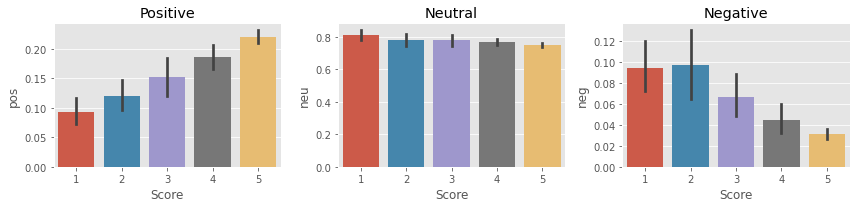

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [33]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [34]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

##### VADER results on example
print(example)
sia.polarity_scores(example)

In [35]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.00944379, 'roberta_neu': 0.073691845, 'roberta_pos': 0.91686445}


In [36]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [37]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 433780
Broke for id 334176
Broke for id 141821
Broke for id 261662


In [38]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [39]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

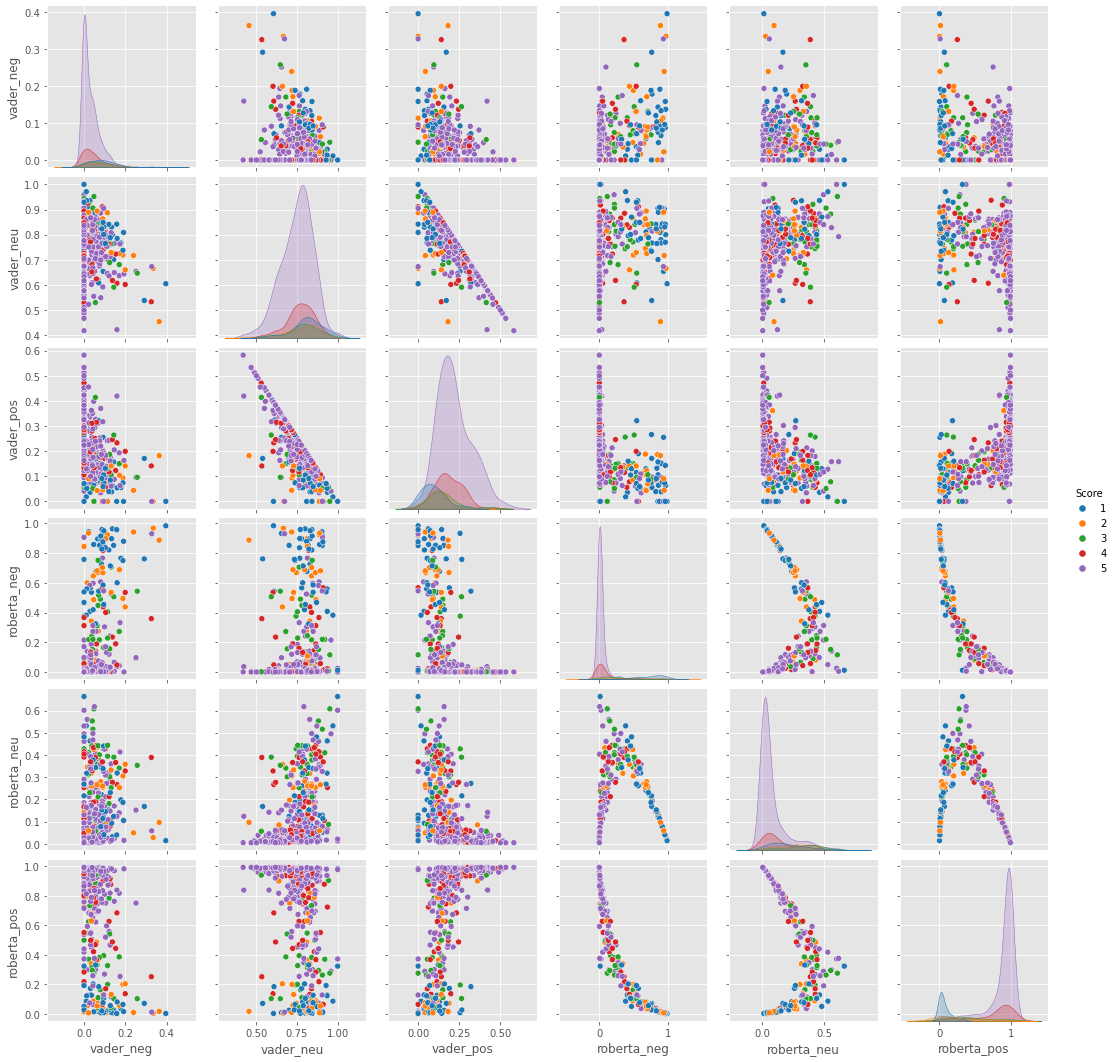

In [40]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

In [41]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I know nettle tea has a pretty distinct taste, but this particular brand was just unbearable. The smell reminded me of fish food pellets, and it had a fishy taste, too. I bought a pound of loose nettles from somewhere else for a lot cheaper, and the taste is so much better.'

In [42]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

"I love cheese-flavored snacks and I was highly disappointed by these. Their styrofoam texture was offset only by putrid tang of faux cheese powder. I'm pretty sure the only good Smart Fries flavor is salt and vinegar."

In [43]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'You just can\'t beat this cereal ! No sugar or worse yet, "high frutose corn surup" !! Foods with that junk should be BANNED !  Doyle'

In [44]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'You just can\'t beat this cereal ! No sugar or worse yet, "high frutose corn surup" !! Foods with that junk should be BANNED !  Doyle'

In [45]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [46]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [47]:
sent_pipeline('Make sure to like and subscribe!')

[{'label': 'POSITIVE', 'score': 0.9991742968559265}]

In [48]:
sent_pipeline('booo')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]

In [49]:
sent_pipeline('booo')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]